### Работа с данными компаниии Binipharm

In [1]:
# Загружаем необходимые библиотеки

import pandas as pd
from datetime import datetime
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

In [130]:
# Подгружаем таблицы данных
# - первая таблица: основная информация по регионам
# - вторая таблица: дополненные данные по смс и емейл сообщениям

company_sms_email = pd.read_csv('Данные по маркетинговым кампаниям смс и e-mail.xlsx - data.csv')
binipharm_info = pd.read_excel('Binipharm Data SMS_Email.xlsx')

In [131]:
print(company_sms_email.describe())
print(binipharm_info.describe())

           oblastId          sent     delivered        opened       clicked  \
count  57794.000000  58457.000000  58457.000000  58457.000000  58457.000000   
mean      47.632886     67.503088     64.535642      2.627880      0.257095   
std       28.716269    244.308691    232.256195     17.998521      2.068508   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%       26.000000      2.000000      2.000000      0.000000      0.000000   
50%       47.000000      8.000000      8.000000      0.000000      0.000000   
75%       66.000000     38.000000     37.000000      1.000000      0.000000   
max      269.000000  12420.000000  10093.000000    993.000000    296.000000   

       unsubscribed  
count  58457.000000  
mean       0.091229  
std        0.886007  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       78.000000  
              sent     delivered       opened      clicked  unsubscribed
count   3387.0000

In [132]:
print(company_sms_email['data_kommunikacii'].head(1))
print(binipharm_info.data_kommunikacii.head(1))

0    1/12/2022
Name: data_kommunikacii, dtype: object
0    2022-01-12
Name: data_kommunikacii, dtype: object


In [133]:
# Функия для конвертации даты коммуникации в датафрейме company_sms_email

def date_kom(data):
    try:
        return datetime.strptime(data, '%m/%d/%Y')
    except:
        pass

In [134]:
# Функция для конвертации даты коммуникации в датафрейме binipharm_info

def date_kom2(data):
    try:
        return datetime.strptime(data, '%Y-%m-%d')
    except:
        pass

In [135]:
# конвертация данных в колонке data_kommunikacii

binipharm_info['data_kommunikacii'] = binipharm_info.data_kommunikacii.apply(date_kom2)
company_sms_email['data_kommunikacii'] = company_sms_email.data_kommunikacii.apply(date_kom)

In [136]:
print(company_sms_email['data_kommunikacii'].head(1))
print(binipharm_info.data_kommunikacii.head(1))

0   2022-01-12
Name: data_kommunikacii, dtype: datetime64[ns]
0   2022-01-12
Name: data_kommunikacii, dtype: datetime64[ns]


#### Соединяем два датафрейма

In [25]:
# binipharm_info.where((binipharm_info.brand == 'Гастростат, Урдокса')&(binipharm_info.target == 'Аллергологи')&(binipharm_info.data_kommunikacii == '2022-01-12')).dropna()

In [26]:
# company_sms_email.where((company_sms_email.brand == 'Гастростат, Урдокса')&(company_sms_email.target == 'Аллергологи')&(company_sms_email.data_kommunikacii == '2022-01-12')).dropna()

In [137]:
binipharm_dop = company_sms_email[['istochnik', 'kanal', 'channel', 'data_kommunikacii', 'id_kommunikacii',
       'nazvanie_kommunikacii', 'tekst_kommunikacii', 'brand', 'target',
       'oblastId', 'oblast']].merge(binipharm_info, how='left', on=['istochnik', 'kanal', 'data_kommunikacii', 'id_kommunikacii',
       'nazvanie_kommunikacii', 'tekst_kommunikacii', 'brand', 'target'])
binipharm_dop.dropna().head(2)

,istochnik,kanal,channel,data_kommunikacii,id_kommunikacii,nazvanie_kommunikacii,tekst_kommunikacii,brand,target,oblastId,oblast,sent,delivered,opened,clicked,unsubscribed
0,Breffi,Внешниe email,email,2022-01-12,707e61c0-c545-420a-b41f-f86e951c3a49,"12.01.2022 АК033_БФГ_Гастростат, Урдокса_E-mai...","12.01.2022 АК033_БФГ_Гастростат, Урдокса_E-mai...","Гастростат, Урдокса",Аллергологи,2.0,Башкортостан Республика,1.0,1.0,0.0,0.0,0.0
1,Breffi,Внешниe email,email,2022-01-12,707e61c0-c545-420a-b41f-f86e951c3a49,"12.01.2022 АК033_БФГ_Гастростат, Урдокса_E-mai...","12.01.2022 АК033_БФГ_Гастростат, Урдокса_E-mai...","Гастростат, Урдокса",Гастроэнтерологи,2.0,Башкортостан Республика,594.0,442.0,101.0,8.0,0.0


In [138]:
# проверка наполненности полученного датафрейма

print(binipharm_dop.opened.sum())
print(company_sms_email.opened.sum())

16273304.999999996
153618


In [139]:
# соединяем два датафрейма

binipharm_info_all = (pd.concat([company_sms_email,binipharm_dop], ignore_index=True)).dropna()
binipharm_info_all.describe()

,oblastId,sent,delivered,opened,clicked,unsubscribed
count,113902.000000,113902.000000,113902.000000,113902.000000,113902.000000,113902.000000
mean,47.611245,2365.120481,2267.025425,142.266606,46.230347,3.516172
std,28.696450,5178.334154,4924.355711,358.368101,199.084990,15.039619
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,5.000000,5.000000,0.000000,0.000000,0.000000
50%,47.000000,63.000000,61.000000,0.000000,0.000000,0.000000
75%,66.000000,1582.000000,1556.000000,44.000000,4.000000,0.000000
max,269.000000,35735.000000,33905.000000,3826.000000,3320.000000,191.000000


#### Компонуем данные в датафрейме. Группируем по колонкам

In [35]:
# Функция, позволяющая определить, количество уникальных значений в столбце

dict_columns = {}
def columns_rating(data):
    for i in list(data.columns):
        dict_columns[len(data[i].unique())] = i
    for k in list((dict(sorted(dict_columns.items(),reverse=True))).items()):
        print (k)

In [140]:
columns_rating(binipharm_info_all)

(1730, 'sent')
(1728, 'delivered')
(856, 'id_kommunikacii')
(838, 'nazvanie_kommunikacii')
(746, 'tekst_kommunikacii')
(472, 'opened')
(355, 'data_kommunikacii')
(212, 'clicked')
(125, 'oblast')
(119, 'oblastId')
(61, 'unsubscribed')
(55, 'brand')
(45, 'target')
(4, 'kanal')
(2, 'channel')


In [141]:
binipharm_info_all = binipharm_info_all.groupby(['id_kommunikacii','nazvanie_kommunikacii','tekst_kommunikacii','data_kommunikacii','oblast','oblastId','brand','target','kanal','channel','istochnik']).sum().reset_index()
binipharm_info_all.describe()

,oblastId,sent,delivered,opened,clicked,unsubscribed
count,57595.000000,57595.000000,57595.000000,57595.000000,57595.000000,57595.000000
mean,47.617502,4677.349648,4483.353242,281.351697,91.426843,6.953711
std,28.726746,6623.497998,6286.766118,468.598466,272.589266,20.837233
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,154.000000,150.000000,0.000000,0.000000,0.000000
50%,47.000000,1489.000000,1430.000000,38.000000,4.000000,0.000000
75%,66.000000,7392.000000,7219.000000,367.000000,52.000000,5.000000
max,269.000000,39125.000000,38850.000000,4589.000000,3320.000000,218.000000


In [142]:
print(binipharm_info_all.sent.sum())
print(company_sms_email.sent.sum())

269391952.99999964
3946028


In [143]:
binipharm_info_all.head(2)

,id_kommunikacii,nazvanie_kommunikacii,tekst_kommunikacii,data_kommunikacii,oblast,oblastId,brand,target,kanal,channel,istochnik,sent,delivered,opened,clicked,unsubscribed
0,00793d2e-0c76-4b1a-ac43-3e139cadd484,"22.03.2023 ВА036_Биннофарм_Сосуд. хирурги, фле...","22.03.2023 ВА036_Биннофарм_Сосуд. хирурги, фле...",2023-03-22,АР Крым,91.0,"Венарус, Венапрокт Алиум, Дексонал",Хирурги,Внешниe email,email,Breffi,0.0,0.0,0.0,0.0,0.0
1,00793d2e-0c76-4b1a-ac43-3e139cadd484,"22.03.2023 ВА036_Биннофарм_Сосуд. хирурги, фле...","22.03.2023 ВА036_Биннофарм_Сосуд. хирурги, фле...",2023-03-22,Адыгея республика,1.0,"Венарус, Венапрокт Алиум, Дексонал",Хирурги,Внешниe email,email,Breffi,0.0,0.0,0.0,0.0,0.0


#### Дополняем датафрейм данными opened/sent и percent - процентное отношение открытий к отправленным сообщениям

In [42]:
# Функция, позволяющая определить соотношение opened/sent

def open_sent(data):
    if data['sent'] != 0:
        return (data['opened'] / data['sent'])
    else:
        return 0

In [144]:
binipharm_info_all['opened/sent'] = binipharm_info_all.apply(open_sent, axis=1)
binipharm_info_all['percent'] = binipharm_info_all['opened/sent'].apply(lambda x: int(x * 100))

In [145]:
binipharm_info_all.describe()

,oblastId,sent,delivered,opened,clicked,unsubscribed,opened/sent,percent
count,57595.000000,57595.000000,57595.000000,57595.000000,57595.000000,57595.000000,57595.000000,57595.000000
mean,47.617502,4677.349648,4483.353242,281.351697,91.426843,6.953711,0.083109,8.017502
std,28.726746,6623.497998,6286.766118,468.598466,272.589266,20.837233,0.847455,84.730968
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,154.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,1489.000000,1430.000000,38.000000,4.000000,0.000000,0.041850,4.000000
75%,66.000000,7392.000000,7219.000000,367.000000,52.000000,5.000000,0.131743,13.000000
max,269.000000,39125.000000,38850.000000,4589.000000,3320.000000,218.000000,201.500000,20150.000000


#### Добавляем в датафрейм информацию по рейтингу каналов - "kanal"

In [146]:
# проверяем, сколько по сумме opened/sent для каждого канала

binipharm_info_all.groupby('kanal').sum().reset_index()[['kanal','opened/sent']]

,kanal,opened/sent
0,Внешниe email,3368.940159
1,Внешние СМС,0.000000
2,Внутренние email,699.291002
3,Внутренние СМС,718.403560


In [75]:
# Функция, определяющая, к какому типу относим канал

def rating_kanal(data):
    if data == 'Внешние СМС':
        return 'No data'
    elif data == 'Внутренние email':
        return 'low'
    elif data == 'Внутренние СМС':
        return 'middle'
    else:
        return 'hight'

In [147]:
# Добавляем колонку rating_kanal

binipharm_info_all['rating_kanal'] = binipharm_info_all.kanal.apply(rating_kanal)
binipharm_info_all.rating_kanal.unique()

array(['hight', 'No data', 'middle', 'low'], dtype=object)

#### Добавляем в датафрейм данные по рейтингу областей

In [148]:
# Определяем, что id и oblast имеют разное количество, что означает наличие дублирующих значений в колонке oblast

print(len(binipharm_info_all.oblastId.unique()))
print(len(binipharm_info_all.oblast.unique()))

119
125


In [149]:
# Определяем отдельный датафрейм по областям

rating_obl = binipharm_info_all.groupby('oblastId').sum().reset_index()[['oblastId','opened/sent']].sort_values('opened/sent',ascending=False)
rating_obl.describe()

,oblastId,opened/sent
count,119.000000,119.000000
mean,77.008403,40.223821
std,61.808822,40.964235
min,1.000000,0.000000
25%,30.500000,5.891082
50%,60.000000,42.370936
75%,108.500000,57.647851
max,269.000000,370.120340


In [115]:
# Функция, позволяющая провести градацию по сегментам: высокий, средний, низкий

def rating_oblast(data):
    if float(rating_obl.where(rating_obl.oblastId == data).dropna()['opened/sent']) < ((rating_obl['opened/sent'].max() - rating_obl['opened/sent'].min()) * 0.2):
        return 'low'
    elif float(rating_obl.where(rating_obl.oblastId == data).dropna()['opened/sent']) > ((rating_obl['opened/sent'].max() - rating_obl['opened/sent'].min()) * 0.66):
        return 'hight'
    else:
        return 'middle'

In [150]:
rating_obl['rating_oblast'] = rating_obl.oblastId.apply(rating_oblast)
rating_obl.rating_oblast.unique()

array(['hight', 'middle', 'low'], dtype=object)

In [151]:
# Дополняем основной датафрейм информацией о рейтинге областей

binipharm_info_all = binipharm_info_all.merge(rating_obl[['oblastId','rating_oblast']], on='oblastId')

In [153]:
binipharm_info_all.rating_oblast.unique()

array(['low', 'middle', 'hight'], dtype=object)

#### Добавляем в датафрейм данные по рейтингу брендов

In [157]:
# Определяем отдельный датафрейм по брендам

rating_brand = binipharm_info_all.groupby('brand').sum().reset_index()[['brand','opened/sent']].sort_values('opened/sent',ascending=False)
rating_brand.describe()

,opened/sent
count,55.000000
mean,87.029722
std,157.689086
min,0.000000
25%,2.904782
50%,27.292963
75%,95.207968
max,1017.498994


In [164]:
# Функция, позволяющая провести градацию по сегментам: высокий, средний, низкий

def rating_br(data):
    if float(rating_brand.where(rating_brand.brand == data).dropna()['opened/sent']) < ((rating_brand['opened/sent'].max() - rating_brand['opened/sent'].min()) * 0.2):
        return 'low'
    elif float(rating_brand.where(rating_brand.brand == data).dropna()['opened/sent']) > ((rating_brand['opened/sent'].max() - rating_brand['opened/sent'].min()) * 0.66):
        return 'hight'
    else:
        return 'middle'

In [166]:
rating_brand['rating_brand'] = rating_brand.brand.apply(rating_br)
rating_brand.rating_brand.unique()

array(['hight', 'middle', 'low'], dtype=object)

In [168]:
# Дополняем основной датафрейм информацией о рейтинге брендов

binipharm_info_all = binipharm_info_all.merge(rating_brand[['brand','rating_brand']], on='brand')

In [172]:
binipharm_info_all.head(3)

,id_kommunikacii,nazvanie_kommunikacii,tekst_kommunikacii,data_kommunikacii,oblast,oblastId,brand,target,kanal,channel,...,sent,delivered,opened,clicked,unsubscribed,opened/sent,percent,rating_kanal,rating_oblast,rating_brand
0,00793d2e-0c76-4b1a-ac43-3e139cadd484,"22.03.2023 ВА036_Биннофарм_Сосуд. хирурги, фле...","22.03.2023 ВА036_Биннофарм_Сосуд. хирурги, фле...",2023-03-22,АР Крым,91.0,"Венарус, Венапрокт Алиум, Дексонал",Хирурги,Внешниe email,email,...,0.0,0.0,0.0,0.0,0.0,0.000000,0,hight,low,middle
1,05c98dad-b102-456a-9a36-79774c8fe966,"25.05.2023 ВА036_Биннофарм_Сосуд. хирурги, фле...","25.05.2023 ВА036_Биннофарм_Сосуд. хирурги, фле...",2023-05-25,АР Крым,91.0,"Венарус, Венапрокт Алиум, Дексонал",Хирурги,Внешниe email,email,...,1193.0,1180.0,76.0,7.0,0.0,0.063705,6,hight,low,middle
2,12bfc906-f172-463f-84d1-bcbe48cc1680,"13.03.2023 ВА036_Биннофарм_Сосуд. хирурги, фле...","13.03.2023 ВА036_Биннофарм_Сосуд. хирурги, фле...",2023-05-12,АР Крым,91.0,"Венарус, Венапрокт Алиум, Дексонал",Хирурги,Внешниe email,email,...,2.0,0.0,0.0,0.0,0.0,0.000000,0,hight,low,middle


#### Разделяем датафрейм  только со значениями колонки brand = "Nobrand" 

In [174]:
binipharm_info_nobrand = binipharm_info_all.where(binipharm_info_all.brand == 'No Brand').dropna().reset_index().drop(columns='index')
binipharm_info_nobrand.describe()

,oblastId,sent,delivered,opened,clicked,unsubscribed,opened/sent,percent
count,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000
mean,46.349297,2481.489709,2376.712044,167.393316,18.589362,12.249643,0.080242,7.785612
std,25.001351,4007.848498,3819.737549,275.899628,33.537858,33.957400,0.141025,13.993232
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,22.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,632.000000,580.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,3525.000000,3462.000000,321.000000,20.000000,5.000000,0.151950,15.000000
max,261.000000,23642.000000,23369.000000,1748.000000,155.000000,218.000000,1.000000,100.000000


In [175]:
# Выгружаем данные по четырем таблицам в таблицы excell

In [683]:
binipharm_info_all.to_excel('binipharm_info_all.xlsx')
binipharm_info_nobrand.to_excel('binipharm_info_nobrand.xlsx')
rating_brand.to_excel('binipharm_rating_brand.xlsx')
rating_obl.to_excel('binipharm_rating_obl.xlsx')

### Дополнение

Венарус, Венапрокт Алиум, Дексонал


<Figure size 640x480 with 0 Axes>

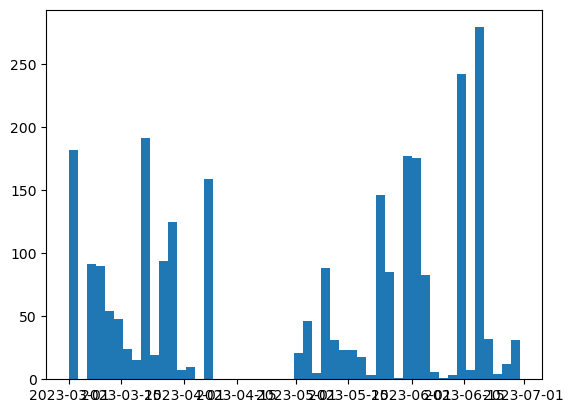

In [176]:
for x in binipharm_info_all.brand.unique():    #  разборное занятие
    print(x)
    plt.figure()
    plt.show()
    one,two,result = plt.hist(binipharm_info_all[binipharm_info_all.brand == x].data_kommunikacii,50)
    plt.show()
    break